$$\Large \textbf{The Convolutional Neural Networks (CNNs) for monthly Exchange Rate dataset}$$

$\textbf{Problem description}$: There is a widely-accepted issue, so-called: $\textbf{"The exchange rate disconnect"}$ or $\textbf{"The exchange rate puzzle"}$. Therefore, a number of both Frequentist and Bayesian econometric models have great difficulties to predict the fluctuations in this variable. Hence, the main purpose of this project is to address this issue. Indeed, this AI project aims to predict the Nominal Effective Exchange Rate (NEER) of the 12-EU Nations. Accordingly, I develop and train Convolutional Neural Networks (CNNs). The trained AI model is used to forecast.

$\textbf{Author}$: This Jupiter code is written by Phuong Van Nguyen (2019). It was created during his Ph.D. internship in the Modelling Division at the Sveriges Riksbank (the central bank of Sweden). This project was then presented in the internal seminar at this central bank (Stockholm, November 2019).

$\textbf{Dataset}$: The monthly NEER data is used from the database of Darvas, Zsolt (2012a) $\textit{'Real effective exchange rates for 178 countries: A new database'}$, Working Paper 2012/06, Bruegel, 15 March 2012. The dataset has a monthly period of January 1970 - September 2019, or 579 observations. Furthermore, the dataset has an obvious trend and seasonal component. It can be directly downloaded from the link below.

https://bruegel.org/publications/datasets/real-effective-exchange-rates-for-178-countries-a-new-database/

$\textbf{Caution}$: The author does not take any responsibility for the explanations, the mistake of code, and the program running on other devices. More importantly, the view of this project is to belong to the author, does not necessarily reflect the views of the Sveriges Riksbank.


# 1. Preparing Problem

## 1.1. Loading necessary libraries

In [1]:
from math import sqrt
from numpy import array
from numpy import mean
from numpy import std
import pandas as pd
from pandas import DataFrame
from pandas import concat
from pandas import read_csv
import numpy as np
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
#from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.


# 2. Data preparation

## 2.1. Loading data

In [2]:
series = pd.read_excel('REER_database_ver4Oct2019.xls',sheet_name='NEER_MONTHLY_38')#,names='NEER_38_EA12')
series.head(10)

,Updated: 4 October 2019,NEER_38_AE,NEER_38_AF,NEER_38_AG,NEER_38_AL,NEER_38_AM,NEER_38_AO,NEER_38_AR,NEER_38_AT,NEER_38_AU,...,NEER_38_US,NEER_38_UY,NEER_38_UZ,NEER_38_VC,NEER_38_VE,NEER_38_VN,NEER_38_WS,NEER_38_YE,NEER_38_ZA,NEER_38_ZM
0,1970M01,57.156914,NaN,183.744525,NaN,NaN,2.247103e+11,2.983147e+12,42.877602,109.399564,...,33.534947,4.288365e+06,NaN,108.402445,16095.610751,NaN,313.649440,NaN,796.789463,196322.665430
1,1970M02,57.184988,NaN,183.779676,NaN,NaN,2.247855e+11,2.985902e+12,42.886058,109.483793,...,33.575146,4.291790e+06,NaN,108.441118,16110.899527,NaN,313.707246,NaN,797.125459,196385.868239
2,1970M03,57.272265,NaN,183.878698,NaN,NaN,2.248182e+11,2.993236e+12,42.918261,109.802174,...,33.733378,4.301049e+06,NaN,108.534115,16134.644386,NaN,313.883152,NaN,798.244790,196581.336397
3,1970M04,57.395405,NaN,183.943819,NaN,NaN,2.249179e+11,2.999631e+12,42.935689,110.030140,...,33.774035,4.308912e+06,NaN,108.620210,16157.416348,NaN,314.228590,NaN,799.046375,196736.084909
4,1970M05,57.513002,NaN,184.023594,NaN,NaN,2.248868e+11,3.006233e+12,42.954601,110.251877,...,33.852790,4.317168e+06,NaN,108.712362,16181.236287,NaN,314.565166,NaN,799.882811,196910.612021
5,1970M06,57.496856,NaN,183.925328,NaN,NaN,2.245109e+11,2.630402e+12,42.937622,110.176165,...,33.615046,4.315623e+06,NaN,108.662952,16176.559284,NaN,314.489141,NaN,799.427504,196782.432227
6,1970M07,57.512830,NaN,183.935307,NaN,NaN,2.241804e+11,2.633606e+12,42.938974,110.205308,...,33.591702,4.319520e+06,NaN,108.689416,16191.442858,NaN,314.518516,NaN,799.590628,196822.213893
7,1970M08,57.771003,NaN,184.178539,NaN,NaN,2.244969e+11,2.645374e+12,43.067959,110.393478,...,33.612881,4.337154e+06,NaN,109.047207,16296.950635,NaN,314.672292,NaN,801.528672,197198.384527
8,1970M09,57.874864,NaN,184.273481,NaN,NaN,2.245651e+11,2.648625e+12,43.118153,110.472919,...,33.616407,4.341904e+06,NaN,109.183599,16316.633932,NaN,314.722754,NaN,802.262788,197329.180510
9,1970M10,57.888260,NaN,184.301510,NaN,NaN,2.247216e+11,2.647757e+12,43.122013,110.501906,...,33.657003,4.341408e+06,NaN,109.208646,16329.183281,NaN,314.751895,NaN,802.379490,197340.520518


In [5]:
data=series.NEER_38_EA12
data=data.values
data

array([ 45.13717116,  45.17140627,  45.30564372,  45.36187771,
        45.41912989,  45.38065531,  45.38998163,  45.80902455,
        45.97225092,  45.98377016,  45.98431476,  45.98949435,
        45.99037139,  45.99410545,  46.00224004,  46.01395008,
        46.33716842,  46.51062372,  46.80428193,  47.0710423 ,
        47.11222892,  47.17629818,  47.16143899,  46.76031475,
        48.23211191,  48.4517072 ,  48.65427757,  48.68647288,
        48.80997242,  48.96715677,  49.66225593,  49.47617129,
        49.61928538,  49.67152175,  49.81646213,  49.77649003,
        49.67192892,  50.59754695,  51.75771899,  51.33841206,
        51.53488694,  53.10511089,  55.74063368,  54.99238777,
        55.66394434,  55.99845665,  54.71850769,  53.75966847,
        52.03977715,  52.09060135,  52.73244936,  52.98540138,
        53.44201737,  52.98334456,  53.45718074,  53.23803084,
        52.91762152,  53.49452655,  54.30295848,  55.590291  ,
        56.89890918,  57.27157488,  57.50767976,  57.44

In [6]:
data.shape

(597,)

## 2.2. Looking at data properties

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


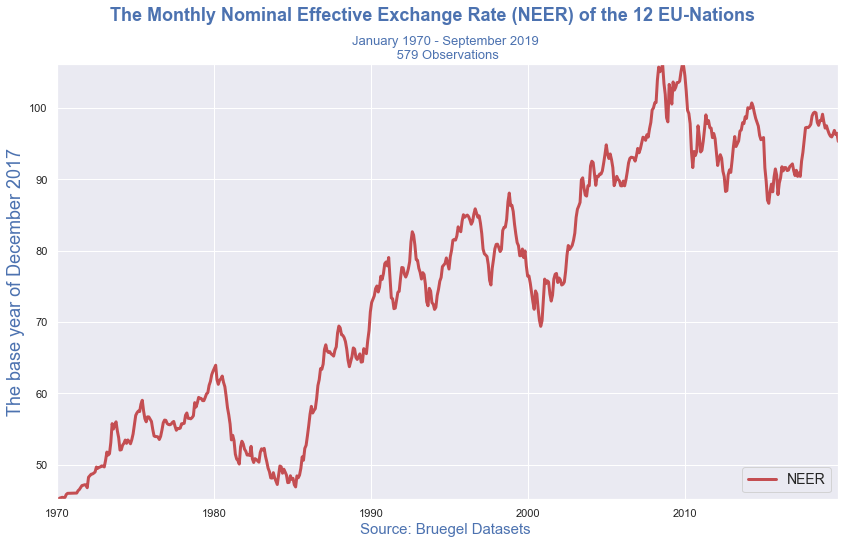

In [272]:
time=np.linspace(1970,2019+9/12,len(data))
time
sns.set()
fig=plt.figure(figsize=(14,8))
plt.plot(time,data,LineWidth=3,Color='r',label='NEER')
plt.autoscale(enable=True,axis='both',tight=True)
fig.suptitle('The Monthly Nominal Effective Exchange Rate (NEER) of the 12 EU-Nations \n '
             ,fontsize=18,fontweight='bold',color='b')
plt.title('January 1970 - September 2019 \n 579 Observations '
          ,fontsize=13,fontweight='normal',color='b')
plt.ylabel('The base year of December 2017',fontsize=18, color='b')
plt.legend(loc='lower right',fontsize=14)
plt.xlabel('Source: Bruegel Datasets ' ,
           fontsize=15,fontweight='ultralight',color='b')
plt.savefig('NEER12Eu.eps')
#\n https://bruegel.org/publications/datasets/real-effective-exchange-rates-for-178-countries-a-new-database/ 

In [61]:
plt.savefig('NEER12Eu.eps')

<Figure size 432x288 with 0 Axes>

## 2.3. Splitting data

### 2.3.1. Creating a functin to split data

In [37]:
def train_test_split(data1, n_test):
	return data[:-n_test], data1[-n_test:]

### 2.3.2. Splitting it

I split the original data into two parts. The train data accounts for 70 percent of the full data, whereas the test data accounts for 30 percent.

In [258]:
# Determining the propotion of test set
n_test=round(0.3*len(data))
n_test

179

In [259]:
# Running the spliting function
train, test = train_test_split(data, n_test)

In [265]:
len(train)

418

In [263]:
len(train)/12

34.833333333333336

In [267]:
34*12

408

In [261]:
len(test)

179

In [262]:
len(data)

597

In [278]:
time

array([1970.        , 1970.08347315, 1970.16694631, 1970.25041946,
       1970.33389262, 1970.41736577, 1970.50083893, 1970.58431208,
       1970.66778523, 1970.75125839, 1970.83473154, 1970.9182047 ,
       1971.00167785, 1971.08515101, 1971.16862416, 1971.25209732,
       1971.33557047, 1971.41904362, 1971.50251678, 1971.58598993,
       1971.66946309, 1971.75293624, 1971.8364094 , 1971.91988255,
       1972.0033557 , 1972.08682886, 1972.17030201, 1972.25377517,
       1972.33724832, 1972.42072148, 1972.50419463, 1972.58766779,
       1972.67114094, 1972.75461409, 1972.83808725, 1972.9215604 ,
       1973.00503356, 1973.08850671, 1973.17197987, 1973.25545302,
       1973.33892617, 1973.42239933, 1973.50587248, 1973.58934564,
       1973.67281879, 1973.75629195, 1973.8397651 , 1973.92323826,
       1974.00671141, 1974.09018456, 1974.17365772, 1974.25713087,
       1974.34060403, 1974.42407718, 1974.50755034, 1974.59102349,
       1974.67449664, 1974.7579698 , 1974.84144295, 1974.92491

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


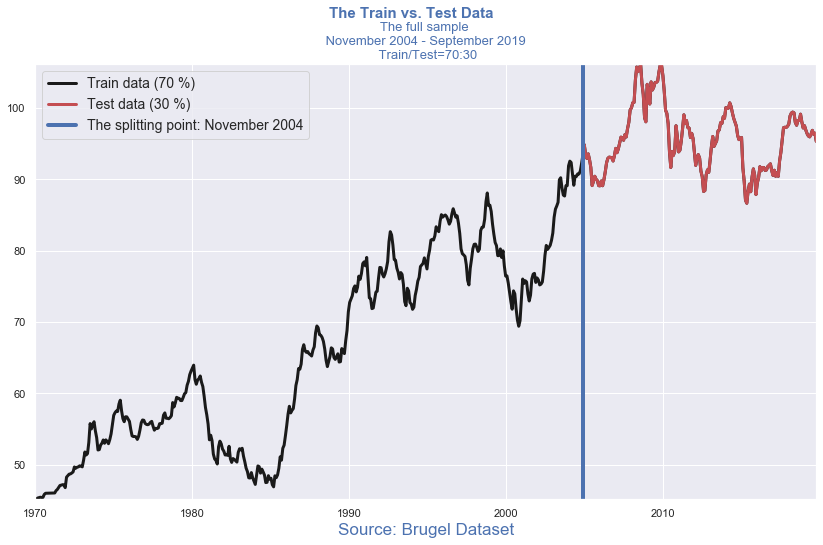

In [283]:
sns.set()
fig=plt.figure(figsize=(14,8))
plt.plot(time,data,LineWidth=3,Color='k',label='Train data (70 %)')
plt.plot(time[418:597],test,LineWidth=3,Color='r',label='Test data (30 %)')
plt.axvline(x=2004.89177852,linewidth=4, color='b',label='The splitting point: November 2004')
#plt.plot(timef,test,LineWidth=3,Color='k',label='Actual values')
plt.autoscale(enable=True,axis='both',tight=True)
fig.suptitle('The Train vs. Test Data \n '
             ,fontsize=15,fontweight='bold',color='b')
plt.title('The full sample \n November 2004 - September 2019 \n Train/Test=70:30'
          ,fontsize=13,fontweight='normal',color='b')
plt.legend(loc='upper left',fontsize=14)
plt.xlabel('Source: Brugel Dataset' ,
           fontsize=17,fontweight='ultralight',color='b')
plt.savefig('TrainVsTestDat.eps')

## 2.4. Creating a series as Supervised Learning

I need to be able to frame the univariate series of observations as a supervised learning
problem so that we can train neural network models. A supervised
learning framing of a series means that the data needs to be split into multiple examples that
the model learn from and generalize across. Each sample must have both an input component
and an output component.

The input component will be some number of prior observations,
such as three years or 36 time steps. The output component will be the NEER in the next
month because I are interested in developing a model to make one-step forecasts.

I can implement this using the shift() function on the Pandas DataFrame. It allows us
to shift a column down (forward in time) or back (backward in time). We can take the series as
a column of data, then create multiple copies of the column, shifted forward or backward in
time in order to create the samples with the input and output elements we require. When a
series is shifted down, NaN values are introduced because we don't have values beyond the start
of the series.

### 2.4.1. Creating a function to do that

In [40]:
def series_to_supervised(data, n_in, n_out=1):
	df = DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# put it all together
	agg = concat(cols, axis=1)
	# drop rows with NaN values
	agg.dropna(inplace=True)
	return agg.values

### 2.4.2. Creating a Supervised Learning dataframe

In [41]:
# Determining the number of lag observations to use as input to the model. This choice is arbitrage
n_input=12

In [49]:
train.shape

(418,)

In [42]:
data_train = series_to_supervised(train, n_input)

In [44]:
data_train.shape

(406, 13)

In [45]:
# Two dataframe
train_x, train_y = data_train[:, :-1], data_train[:, -1]

$\underline{\textbf{Note}}$: By doing the above code, I create an input (train_x) with 12 features, which represents 12 lag observations. On the other hand, an output has only one feature. I can se these input and output datas by running the following code.

In [47]:
# Looking at input and output
for i in range(len(data_train)):
    print(train_x[i], train_y[i])

[45.13717116 45.17140627 45.30564372 45.36187771 45.41912989 45.38065531
 45.38998163 45.80902455 45.97225092 45.98377016 45.98431476 45.98949435] 45.99037139423326
[45.17140627 45.30564372 45.36187771 45.41912989 45.38065531 45.38998163
 45.80902455 45.97225092 45.98377016 45.98431476 45.98949435 45.99037139] 45.99410544913864
[45.30564372 45.36187771 45.41912989 45.38065531 45.38998163 45.80902455
 45.97225092 45.98377016 45.98431476 45.98949435 45.99037139 45.99410545] 46.00224004278686
[45.36187771 45.41912989 45.38065531 45.38998163 45.80902455 45.97225092
 45.98377016 45.98431476 45.98949435 45.99037139 45.99410545 46.00224004] 46.013950082225286
[45.41912989 45.38065531 45.38998163 45.80902455 45.97225092 45.98377016
 45.98431476 45.98949435 45.99037139 45.99410545 46.00224004 46.01395008] 46.33716842050584
[45.38065531 45.38998163 45.80902455 45.97225092 45.98377016 45.98431476
 45.98949435 45.99037139 45.99410545 46.00224004 46.01395008 46.33716842] 46.51062372305984
[45.38998

 66.50888918 68.46822771 69.42629672 69.16780518 68.21324901 68.11763179] 67.81030520126608
[65.84058598 65.53373119 65.39983214 65.21121754 66.03979066 66.50888918
 68.46822771 69.42629672 69.16780518 68.21324901 68.11763179 67.8103052 ] 67.24925280294514
[65.53373119 65.39983214 65.21121754 66.03979066 66.50888918 68.46822771
 69.42629672 69.16780518 68.21324901 68.11763179 67.8103052  67.2492528 ] 66.17840144698408
[65.39983214 65.21121754 66.03979066 66.50888918 68.46822771 69.42629672
 69.16780518 68.21324901 68.11763179 67.8103052  67.2492528  66.17840145] 64.62665220889028
[65.21121754 66.03979066 66.50888918 68.46822771 69.42629672 69.16780518
 68.21324901 68.11763179 67.8103052  67.2492528  66.17840145 64.62665221] 63.72818305924197
[66.03979066 66.50888918 68.46822771 69.42629672 69.16780518 68.21324901
 68.11763179 67.8103052  67.2492528  66.17840145 64.62665221 63.72818306] 64.45822643203927
[66.50888918 68.46822771 69.42629672 69.16780518 68.21324901 68.11763179
 67.810305

In [53]:
train_x.shape

(406, 12)

In [58]:
train_x

array([[45.13717116, 45.17140627, 45.30564372, ..., 45.98377016,
        45.98431476, 45.98949435],
       [45.17140627, 45.30564372, 45.36187771, ..., 45.98431476,
        45.98949435, 45.99037139],
       [45.30564372, 45.36187771, 45.41912989, ..., 45.98949435,
        45.99037139, 45.99410545],
       ...,
       [87.77324382, 87.64098569, 89.08895558, ..., 90.42171275,
        90.38308002, 90.74647287],
       [87.64098569, 89.08895558, 89.09373117, ..., 90.38308002,
        90.74647287, 90.72837864],
       [89.08895558, 89.09373117, 91.87379144, ..., 90.74647287,
        90.72837864, 91.17359202]])

$\underline{\textbf{Note}}$: The CNN model expects input data to be in the form of multiple samples, where each sample
has multiple input time steps, the same as the MLP in the previous section. One difference is
that the CNN can support multiple features or types of observations at each time step, which are
interpreted as channels of an image. I only have a single feature at each time step, therefore
the required three-dimensional shape of the input data will be [n samples, n input, 1].

The following code will reshape the input data train_x from 2-dimenstional to 3-dimenstional forms

In [54]:
train_xx = train_x.reshape((train_x.shape[0], train_x.shape[1], 1))

In [66]:
train_xx.shape

(406, 12, 1)

In [57]:
train_xx

array([[[45.13717116],
        [45.17140627],
        [45.30564372],
        ...,
        [45.98377016],
        [45.98431476],
        [45.98949435]],

       [[45.17140627],
        [45.30564372],
        [45.36187771],
        ...,
        [45.98431476],
        [45.98949435],
        [45.99037139]],

       [[45.30564372],
        [45.36187771],
        [45.41912989],
        ...,
        [45.98949435],
        [45.99037139],
        [45.99410545]],

       ...,

       [[87.77324382],
        [87.64098569],
        [89.08895558],
        ...,
        [90.42171275],
        [90.38308002],
        [90.74647287]],

       [[87.64098569],
        [89.08895558],
        [89.09373117],
        ...,
        [90.38308002],
        [90.74647287],
        [90.72837864]],

       [[89.08895558],
        [89.09373117],
        [91.87379144],
        ...,
        [90.74647287],
        [90.72837864],
        [91.17359202]]])

So now the data is ready to use for training my AI model. However, first, I need to configure my AI model

# 3. Defining model

## 3.1. Creating a function featuring model

Convolutional Neural Networks, or CNNs, are a type of neural network developed for two-
dimensional image data, although they can be used for one-dimensional data such as sequences of
text and time series. When operating on one-dimensional data, the CNN reads across a sequence
of lag observations and learns to extract features that are relevant for making a prediction. I will define a CNN with two convolutional layers for extracting features from the input sequences.
Each will have a configurable number of filters (n_filters) and kernel size (n_kernel) and will use the rectified linear
activation function (activation='relu'). 

The number of filters (n_filters) determines the number of parallel fields on which the
weighted inputs are read and projected. 

The kernel size (n_kernel) defines the number of time steps read
within each snapshot as the network reads along the input sequence.

	model.add(Conv1D(n_filters, n_kernel, activation='relu', input_shape=(n_input, 1)))
	model.add(Conv1D(n_filters, n_kernel, activation='relu'))
    
A max pooling layer (MaxPooling1D()) is used after convolutional layers to distill the weighted input features
into those that are most salient, reducing the input size by 1/4. The pooled inputs are 
attened to one long vector before being interpreted and used to make a one-step prediction.

	model.add(MaxPooling1D())
	model.add(Flatten())
	model.add(Dense(1))



In [68]:
def model_fit(train_x,train_y, config):
	# unpack config
	n_input, n_filters, n_kernel, n_epochs, n_batch = config
	# prepare data
	#data = series_to_supervised(train, n_input)
	#train_x, train_y = data[:, :-1], data[:, -1]
	#train_x = train_x.reshape((train_x.shape[0], train_x.shape[1], 1))
	# define model
	model = Sequential()
    # define convolutional layers
	model.add(Conv1D(n_filters, n_kernel, activation='relu', input_shape=(n_input, 1)))
	model.add(Conv1D(n_filters, n_kernel, activation='relu'))
    # define pooling and output layers
	model.add(MaxPooling1D())
	model.add(Flatten())
	model.add(Dense(1))
	model.compile(loss='mse', optimizer='adam')
	# fit
	model.fit(train_x, train_y, epochs=n_epochs, batch_size=n_batch, verbose=0)
	return model

# 4. Training AI model

## 4.1. Defining model configuration

In [70]:
config = [12, 256, 3, 100, 100]

## 4.2. Training AI model

The trained AI model is then saved as model

In [69]:
model= model_fit(train_xx,train_y,config)

# 5. Making the prediction

For convenience, I create a function to do that

## 5.1. Creating a function to forecasting

In [71]:
def model_predict(model, history, config):
	# unpack config
	n_input, _, _, _, _ = config
	# prepare data
	x_input = array(history[-n_input:]).reshape((1, n_input, 1))
	# forecast
	yhat = model.predict(x_input, verbose=0)
	return yhat[0]

## 5.2. Forecasting with the trained AI model

### 5.2.1. Creating a seed for forecasting

In [304]:
predictions = list()


In [197]:
predictions

[]

In [201]:
len(history)

418

Text(0.5, 1.0, 'A quick check for picking a seed for forecasting')

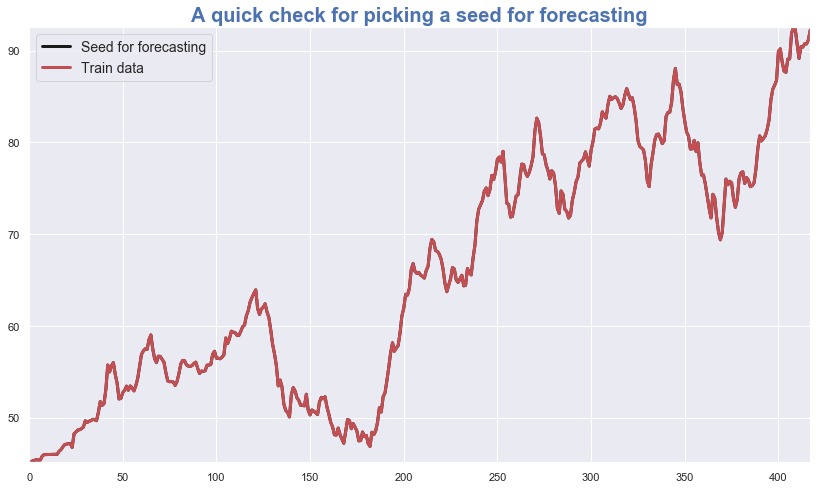

In [216]:
# Quick check
sns.set()
fig=plt.figure(figsize=(14,8))
plt.plot(history,LineWidth=3,Color='k',label='Seed for forecasting')
plt.plot(train,LineWidth=3,Color='r',label='Train data')
plt.autoscale(enable=True,axis='both',tight=True)
plt.legend(loc='upper left',fontsize=14)
plt.title('A quick check for picking a seed for forecasting'
          ,fontsize=20,fontweight='bold',color='b')#fig.suptitle

Ok, these two dataframeworks overlay to each other

In [222]:
# Picking 12 lag obvervations in history as a initial seed
x_input = array(history[-n_input:])#.reshape((1, n_input, 1))

In [223]:
len(x_input)

12

In [224]:
x_input

array([89.09373117, 91.87379144, 92.5324793 , 92.33830355, 90.67243187,
       89.14806225, 90.42171275, 90.38308002, 90.74647287, 90.72837864,
       91.17359202, 92.25557671])

In [220]:
del x_input

In [225]:
len(history)

418

Text(0.5, 1.0, 'A quick check for a initial seed')

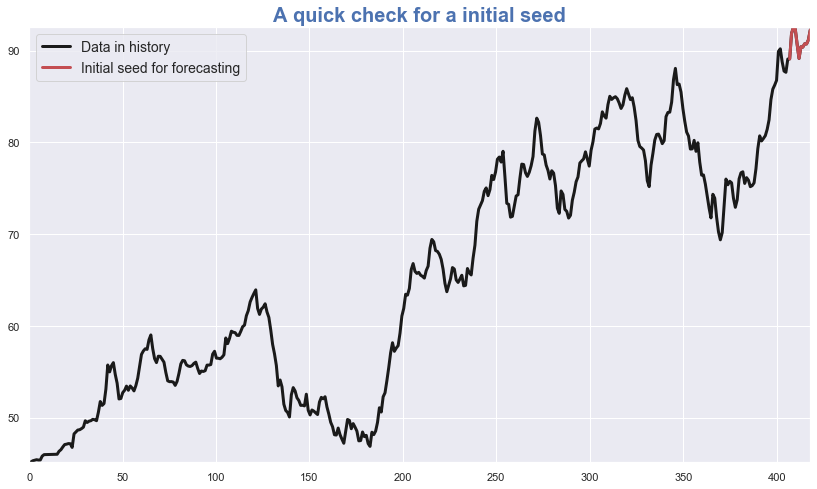

In [227]:
# Quick check
sns.set()
t=np.linspace(0,418,len(history))
fig=plt.figure(figsize=(14,8))
plt.plot(t,history,LineWidth=3,Color='k',label='Data in history')
plt.plot(t[406:418],x_input,LineWidth=3,Color='r',label='Initial seed for forecasting')
plt.autoscale(enable=True,axis='both',tight=True)
plt.legend(loc='upper left',fontsize=14)
plt.title('A quick check for a initial seed'
          ,fontsize=20,fontweight='bold',color='b')#fig.suptitle

Ok! A initial seed is successfully selected

### 5.2.2. Performing the prediction over the test set

In [228]:
len(test)

179

In [305]:
yhatf = list()

In [306]:
yhatf

[]

In [307]:
	# step over each time-step in the test set
	for i in range(len(test)):
		# fit model and make forecast for history
		yhat = model_predict(model, history, config)
		# store forecast in list of predictions
		predictions.append(yhat)
		yhatf.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
	# estimate prediction error

In [308]:
yhatf

[array([97.2177], dtype=float32),
 array([97.08876], dtype=float32),
 array([96.76832], dtype=float32),
 array([96.342316], dtype=float32),
 array([95.90461], dtype=float32),
 array([95.538826], dtype=float32),
 array([95.0878], dtype=float32),
 array([94.777466], dtype=float32),
 array([94.34348], dtype=float32),
 array([93.70487], dtype=float32),
 array([92.94555], dtype=float32),
 array([92.188156], dtype=float32),
 array([91.78777], dtype=float32),
 array([91.407814], dtype=float32),
 array([91.12369], dtype=float32),
 array([90.770004], dtype=float32),
 array([90.48381], dtype=float32),
 array([90.326065], dtype=float32),
 array([90.339935], dtype=float32),
 array([90.650475], dtype=float32),
 array([91.12595], dtype=float32),
 array([91.73266], dtype=float32),
 array([92.21796], dtype=float32),
 array([92.63773], dtype=float32),
 array([92.9223], dtype=float32),
 array([93.16036], dtype=float32),
 array([93.41205], dtype=float32),
 array([93.73234], dtype=float32),
 array([94.055

In [309]:
test

array([ 93.47636506,  94.82766057,  93.52707961,  92.91148286,
        93.54949776,  92.75256865,  91.64008424,  89.10311464,
        89.6849551 ,  90.40902149,  89.99058637,  89.79702992,
        89.0947015 ,  89.07010864,  89.75612028,  89.08238422,
        89.92606705,  91.02708484,  92.29539261,  92.92617954,
        93.08955916,  93.06049036,  92.99258248,  92.55018231,
        93.28936984,  94.32416203,  93.71261234,  94.26561606,
        95.08314146,  95.89750447,  95.80608306,  95.4595107 ,
        96.24613021,  95.9150284 ,  97.0779025 ,  97.97623973,
        99.70383741, 100.        , 100.71041436, 100.76579267,
       103.90568175, 105.7296767 , 105.07670859, 105.48836812,
       106.10048908, 103.43801132, 101.87999598,  98.6161542 ,
        98.04287506, 103.29892733, 102.30077453, 100.54035618,
       103.64096039, 102.50261106, 102.89304082, 103.55499006,
       103.56191316, 103.75441611, 105.06390863, 106.03094519,
       105.96958516, 104.48943449, 102.35546504,  99.66

In [230]:
len(train)

418

In [231]:
len(history)

597

In [233]:
len(data)

597

In [236]:
len(yhatf)

179

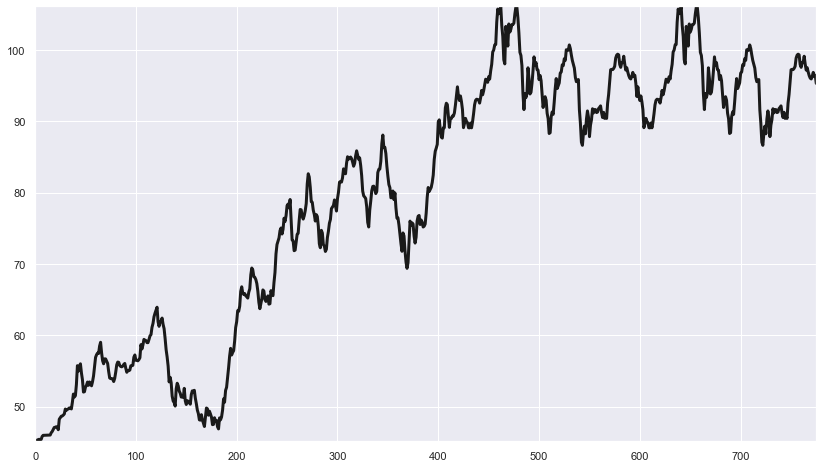

In [237]:
# Quick check
sns.set()
fig=plt.figure(figsize=(14,8))
plt.plot(history,LineWidth=3,Color='k')
#plt.plot(train,LineWidth=3,Color='r')
plt.autoscale(enable=True,axis='both',tight=True)

## 5.3. Plotting the predicted and actual values

In [311]:
len(yhatf)

179

In [312]:
len(test)

179

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


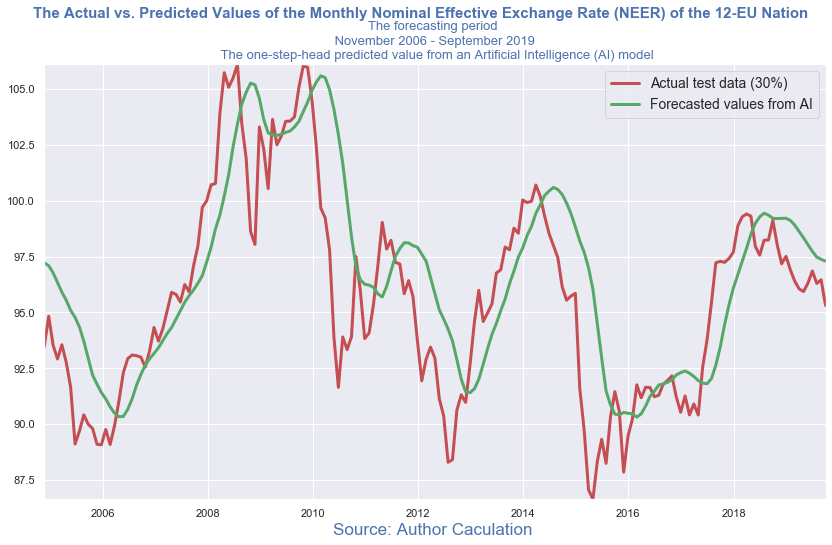

In [310]:
sns.set()
fig=plt.figure(figsize=(14,8))
plt.plot(time[418:597],test,LineWidth=3,Color='r',label='Actual test data (30%)')
plt.plot(time[418:597],yhatf,LineWidth=3,Color='g',label='Forecasted values from AI')
plt.autoscale(enable=True,axis='both',tight=True)
fig.suptitle('The Actual vs. Predicted Values of the Monthly Nominal Effective Exchange Rate (NEER) of the 12-EU Nation \n '
             ,fontsize=15,fontweight='bold',color='b')
plt.title('The forecasting period \n November 2006 - September 2019 \n The one-step-head predicted value from an Artificial Intelligence (AI) model'
          ,fontsize=13,fontweight='normal',color='b')
plt.legend(loc='upper right',fontsize=14)
plt.xlabel('Source: Author Caculation ' ,
           fontsize=17,fontweight='ultralight',color='b')
plt.savefig('NEER12EuForecastActual.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


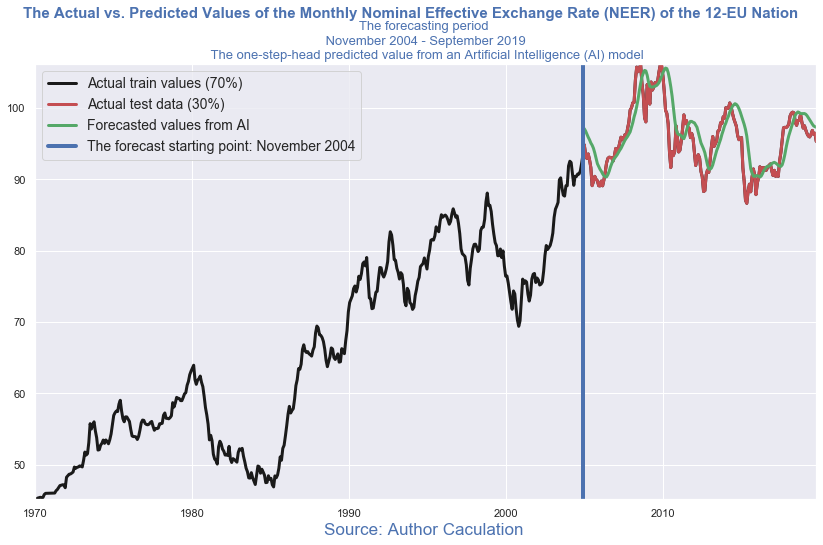

In [314]:
yearf=round(1970+len(train)/12)
timef=np.linspace(yearf+1,2019,len(test))
timef
sns.set()
fig=plt.figure(figsize=(14,8))
plt.plot(time,data,LineWidth=3,Color='k',label='Actual train values (70%)')
plt.plot(time[418:597],test,LineWidth=3,Color='r',label='Actual test data (30%)')
plt.plot(time[418:597],yhatf,LineWidth=3,Color='g',label='Forecasted values from AI')
plt.axvline(x=2004.89177852,linewidth=4, color='b',label='The forecast starting point: November 2004')
plt.autoscale(enable=True,axis='both',tight=True)
fig.suptitle('The Actual vs. Predicted Values of the Monthly Nominal Effective Exchange Rate (NEER) of the 12-EU Nation \n '
             ,fontsize=15,fontweight='bold',color='b')
plt.title('The forecasting period \n November 2004 - September 2019 \n The one-step-head predicted value from an Artificial Intelligence (AI) model'
          ,fontsize=13,fontweight='normal',color='b')
plt.legend(loc='upper left',fontsize=14)
plt.xlabel('Source: Author Caculation ' ,
           fontsize=17,fontweight='ultralight',color='b')
plt.savefig('NEER12EuForecastActual1.eps')

# 6. Evaluating the forecasting accuracy of the AI model

## 6.1. Creating a function

In [245]:
def measure_rmse(actual, predicted):
#	print(' > %.3f' % error)
	return sqrt(mean_squared_error(actual, predicted))

In [247]:
RMSE=measure_rmse(yhatf,test)
RMSE

3.1770651568460018